In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
# このコードを実行すると、出力結果が省略されないらしい。
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: unset; }</style>"))

### ロジスティック写像

In [ ]:
a = 3.84
x = [0.1]
sx = [0.1]
sy = [0]
x_1 = []

for i in x:
  y = x[len(x)-1]
  z = a*y * (1-y)
  x.append(z)
  x_1.append(z)

  # クモの巣図
  sx.append(y)
  sy.append(z)
  sx.append(z)
  sy.append(z)
  
  if len(x) > 25:
    break
print(x)

x_axis = np.arange(0, len(x), 1)
y_axis = np.arange(0, len(x), 1)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("(2)")
# リターンマップ
axes[0].set_title("return map, a=3.84")
axes[0].set_xlabel("x_n")
axes[0].set_ylabel("$x_{n+1}$")
axes[0].set_ylim(0.0, 1.0)
axes[0].set_xlim(0.0, 1.0)
axes[0].scatter(x[0:len(x)-1], x_1, marker="v", color="blue", label="$x_{n+1} = ax_n (1-x_n)$")
axes[0].plot(sx, sy,  marker = "o", color = "red", alpha=0.3, label="web diagram")
axes[0].plot(x_axis, y_axis, color="m", label="$y=x$")
axes[0].legend(bbox_to_anchor=(0.9, 0), loc='lower right', borderaxespad=0, fontsize=10)
# 時系列図
axes[1].set_title("time series a=3.84")
axes[1].set_xlabel("$n$")
axes[1].set_ylabel("$x_n$")
axes[1].plot(x_axis, x)

In [ ]:
delta = 0.001
a = [0]
x = [0.5]
n = 1 # 周期「倍」分岐
r_plot = []


while( 0 < a[len(a)-1] and a[len(a)-1] < 50):
    for i in x:
        y = x[len(x)-1]
        z = a*y * (1-y)
        x.append(z)

        if x[len(x)-1] - z < delta: # 収束している場合
            r_plot.append(z)
            break

        if x[len(x)-n*2] == z: # 倍分岐で収束
            r_plot.append([x[len(x)-i-1] for i in range(n)])
            break
        

plt.scatter(a, )

In [2]:
a = [1, 2, 3]
a[0] = 3
a

[3, 2, 3]

だめだ、なんか良く分かんないし、他の人のを調べてみたらすぐ出てきたw
* https://qiita.com/jabberwocky0139/items/33add5b3725204ad377f

In [2]:
import matplotlib.pyplot as plt
import numpy as np

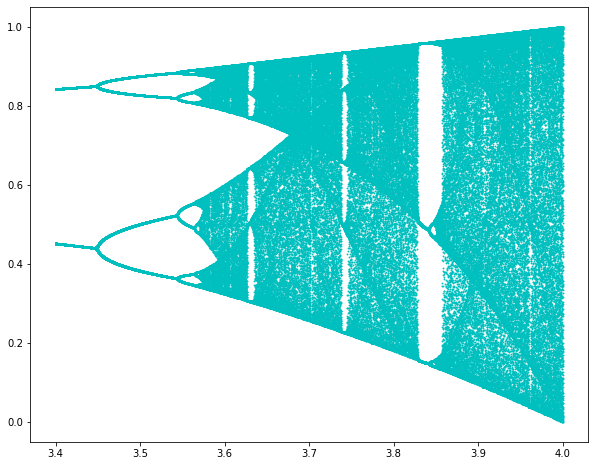

In [5]:
def logistic(a):
    # 関数を先に作っておくほうが、プログラム内で何をしているのか確かにわかりやすいかも...    
    x = [0.8]
    for i in range(400):
        x.append(a * x[-1] * (1 - x[-1]))
    return x[-50:] # 後ろから100番目以降の配列を取得（収束済みと踏んでいる）

plt.figure(figsize=(10, 8))
for a in np.linspace(3.4, 4.0, 4000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=1.7) 
    # なるへそ、その場でプロットしているのね
    # でもこの状態でプロットちゃうと、収束点には大量の点が一か所にプロットされる感じになるけど、...ま、それでもいいのかな    

plt.show()

## ロジスティックマップ

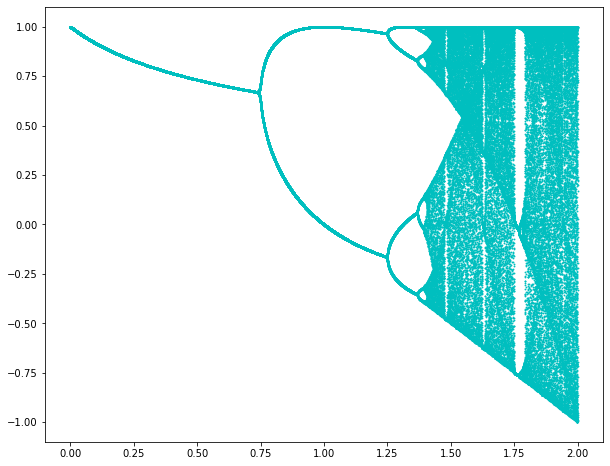

In [3]:
def logistic(a):
    # 関数を先に作っておくほうが、プログラム内で何をしているのか確かにわかりやすいかも...    
    x = [0.8]
    for i in range(400):
        x.append(1 - a* x[-1] * x[-1])
    return x[-50:] # 後ろから100番目以降の配列を取得（収束済みと踏んでいる）

plt.figure(figsize=(10, 8))
for a in np.linspace(0, 2.0, 4000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=1.7) 
    # なるへそ、その場でプロットしているのね
    # でもこの状態でプロットちゃうと、収束点には大量の点が一か所にプロットされる感じになるけど、...ま、それでもいいのかな    

plt.show()

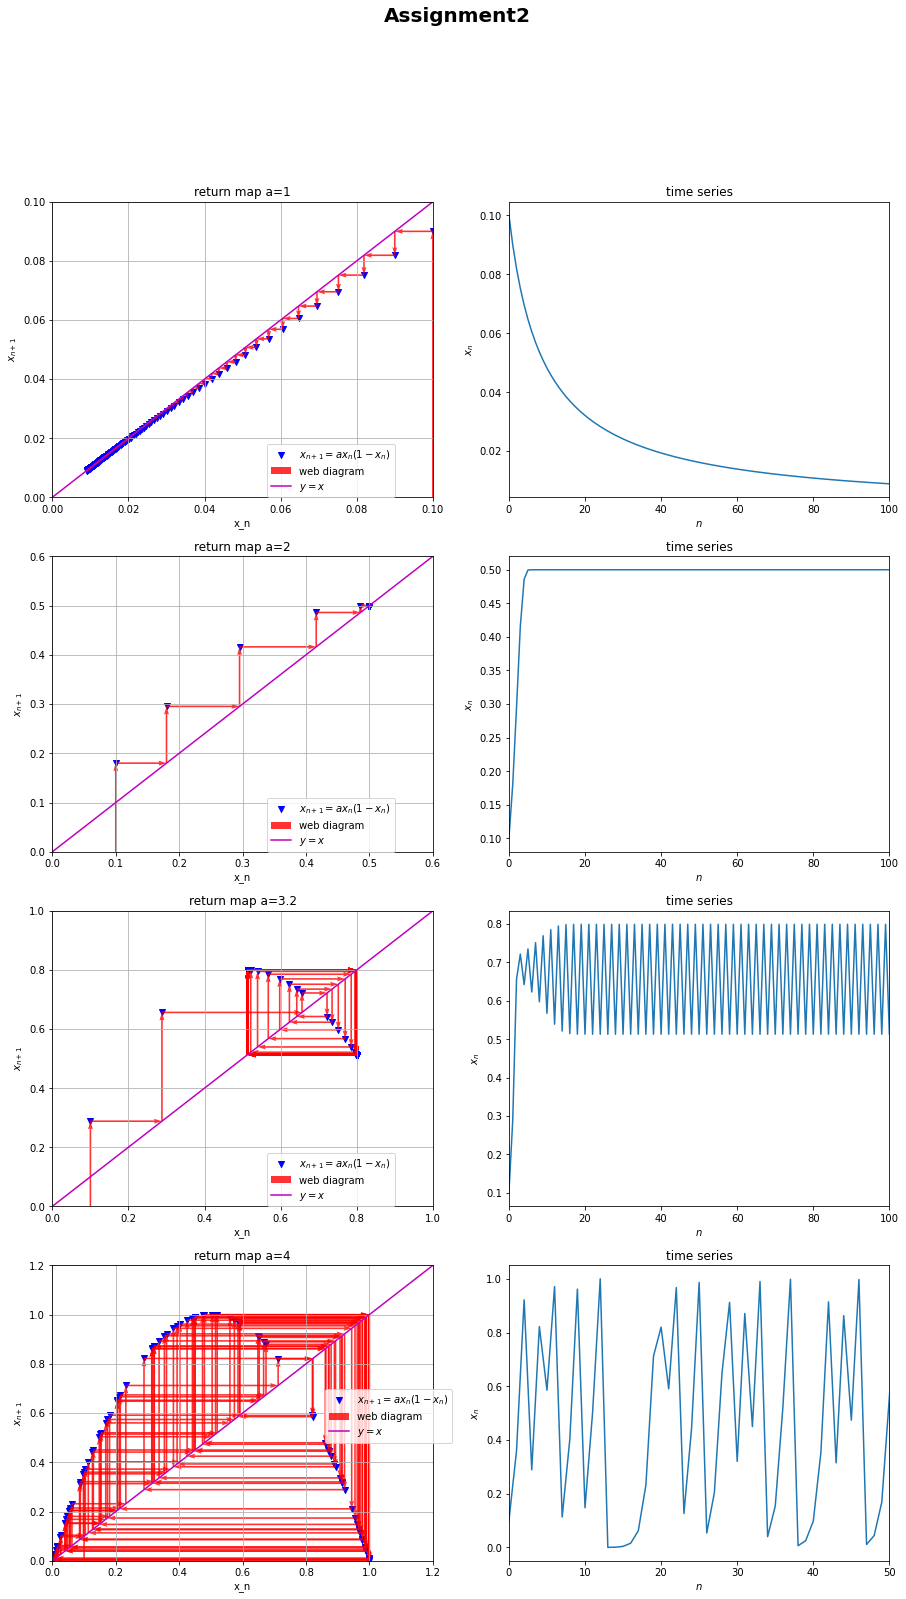

In [15]:
a = [1, 2,  3.2, 4]
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
fig.suptitle("Assignment2", fontsize=20, fontweight="bold", va="baseline")
xmin = [0, 0, 0, 0]
xmax = [0.1, 0.6, 1, 1.2]
legend_x = [0.9, 0.9, 0.9, 1.05]
legend_y = [0, 0, 0, 0.4]
n=[100, 100, 100, 50]

for idx in range(0, 8, 2):
    x = [0.1]
    sx = [0.1]
    sy = [0]
    x_1 = []

    for i in x:
      y = x[len(x)-1]
      z = a[idx//2] * y * (1-y)
      x.append(z)
      x_1.append(z)

      # クモの巣図
      sx.append(y)
      sy.append(z)
      sx.append(z)
      sy.append(z)

      if len(x) > 100:
        break
    # print(x)

    ssx =[]
    ssy = []
    for i in range(1, len(sx)):
      ssx.append(sx[i] - sx[i-1])
      ssy.append(sy[i] - sy[i-1])

    x_axis = np.arange(0, len(x), 1)
    y_axis = np.arange(0, len(x), 1)

    title1 = "return map a=" + str(a[idx//2]) 
    title2 = "time series"
    
    # リターンマップ
    axes[idx//2, 0].set_title(title1)
    axes[idx//2, 0].set_xlabel("x_n")
    axes[idx//2, 0].set_ylabel("$x_{n+1}$")
    axes[idx//2, 0].set_ylim(xmin[idx//2], xmax[idx//2])
    axes[idx//2, 0].set_xlim(xmin[idx//2], xmax[idx//2])
    axes[idx//2, 0].scatter(x[0:len(x)-1], x_1, marker="v", color="blue", label="$x_{n+1} = ax_n (1-x_n)$")
#     axes[idx//2, 0].plot(sx, sy,  marker = "o", color = "red", alpha=0.3, label="web diagram")
    axes[idx//2, 0].quiver(sx[:len(sx)-1], sy[:len(sx)-1], ssx, ssy, angles='xy', scale_units='xy', scale=1, color="red", alpha=0.8, label="web diagram", ) # 矢印プロット
    axes[idx//2, 0].plot(x_axis, y_axis, color="m", label="$y=x$")
    axes[idx//2, 0].grid()
    axes[idx//2, 0].legend(bbox_to_anchor=(legend_x[idx//2], legend_y[idx//2]), loc='lower right', borderaxespad=0, fontsize=10)
    # 時系列図
    axes[idx//2, 1].set_title(title2)
    axes[idx//2, 1].set_xlabel("$n$")
    axes[idx//2, 1].set_ylabel("$x_n$")
    axes[idx//2, 1].set_xlim(0, n[idx//2])
    axes[idx//2, 1].plot(x_axis, x)
    
    '''
    メモリ付けたろって思ったけど、思いのほか分かりにくかったので却下
    if (idx//2)==3:
        axes[idx//2, 1].minorticks_on()
        axes[idx//2, 1].grid(which="minor", axis="x", color="grey", linestyle="--", linewidth=0.8)
        axes[idx//2, 1].grid(which="major", axis="y", color="grey", linestyle="--", linewidth=0.8)
        '''

plt.show()

$x_{n+1} = a x_n(1- x_n) $はa=4の時にはカオスになっている。

## 大域結合写像(Globally Coupled Model)
* 工事中

In [ ]:
N = 2 #2次元


def logistic(a, ep):
    x1 = np.array(0.8)
    x2 = np.array(0.7)
    
    for i in range(400):
        x1.append(a * x1[-1] * (1 - x1[-1]))
        x2.append()
    return x[-50:] # 後ろから100番目以降の配列を取得（収束済みと踏んでいる）

plt.figure(figsize=(10, 8))
for a in np.linspace(3.4, 4.0, 4000):
    x = logistic(a)
    plt.plot([a]*len(x), x, "c.", markersize=1.7) 
    # なるへそ、その場でプロットしているのね
    # でもこの状態でプロットちゃうと、収束点には大量の点が一か所にプロットされる感じになるけど、...ま、それでもいいのかな    

plt.show()